In [1]:
""" setup """
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal
from pyhacores.under_construction.clock_recovery.gardner import GardnerTimingRecovery

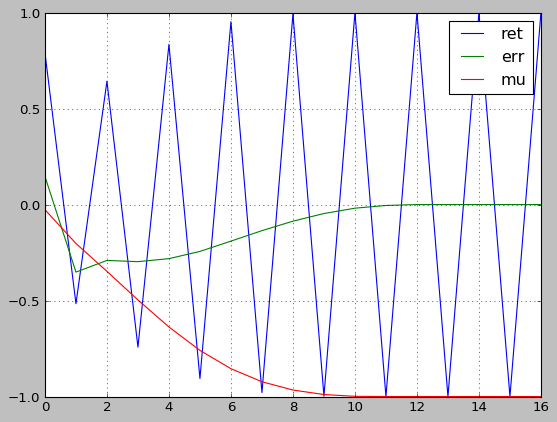

In [18]:
""" perfect input, mu = -1 """

data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')

recover = GardnerTimingRecovery(sps)

ret, err, mu = recover.model_main(match_filtered)

plt.plot(ret, label='ret')
plt.plot(err, label='err')
plt.plot(mu, label='mu')
plt.grid()
plt.legend()
plt.show()

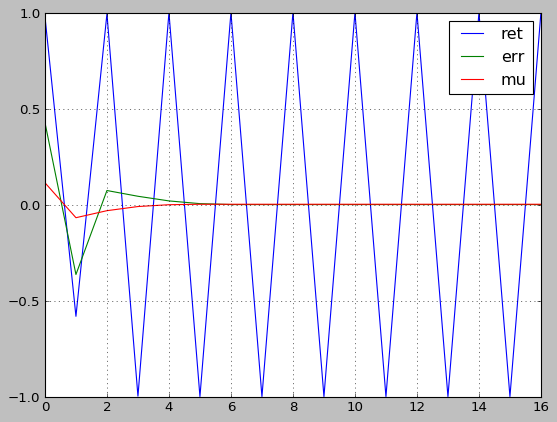

In [17]:
""" perfect input one sample delay, mu = 1 """

# input data
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')

# channel
sig = match_filtered[1:]

recover = GardnerTimingRecovery(sps)

ret, err, mu = recover.model_main(sig)

plt.plot(ret, label='ret')
plt.plot(err, label='err')
plt.plot(mu, label='mu')
plt.grid()
plt.legend()
plt.show()

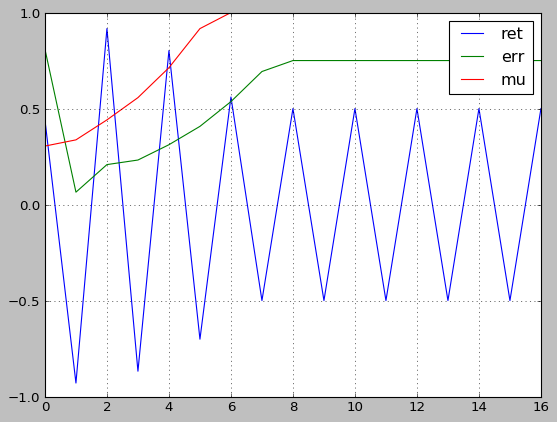

In [24]:
""" perfect input 2 sample delay, mu = 1 """

# input data
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')

# channel
sig = match_filtered[2:]

recover = GardnerTimingRecovery(sps)

ret, err, mu = recover.model_main(sig)

plt.plot(ret, label='ret')
plt.plot(err, label='err')
plt.plot(mu, label='mu')
plt.grid()
plt.legend()
plt.show()

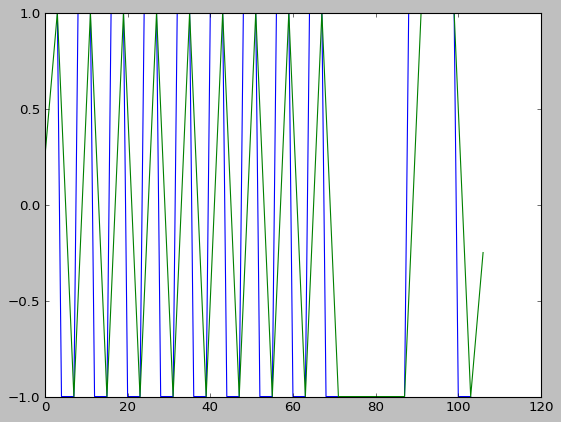

In [57]:
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0]
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
taps = [1 / sps] * sps
match_filtered = np.convolve(nrz_data, taps, mode='full')
plt.plot(nrz_data)
plt.plot(match_filtered)
plt.show()

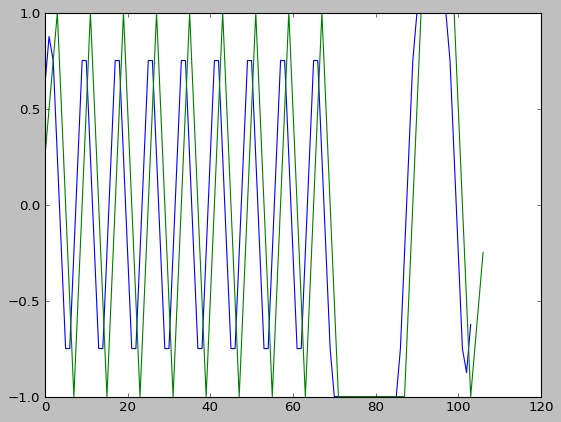

In [186]:
from scipy.interpolate import interp1d

f = interp1d(range(len(match_filtered)), match_filtered)

r = np.array(range(len(match_filtered))) + 0.5
r = r[1:-2]
new = f(r)
plt.plot(new)
plt.plot(match_filtered)
plt.show()

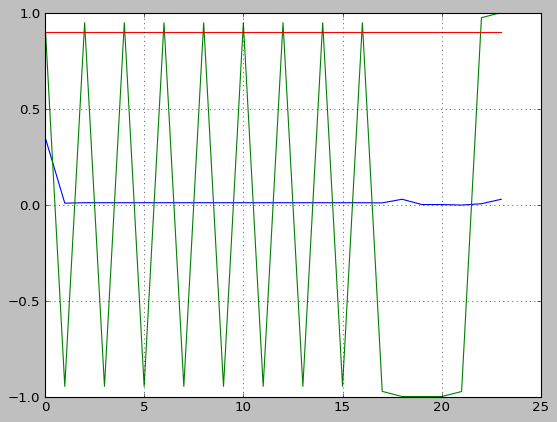

In [185]:
d = 4
x = new
err = []
data = []
mu_debug = []
i = Interpolator()
mu = 0.9
i_out = []
sps_counter = 0
for sample in new:
    i_sample = i.filter(sample, mu)
    i_out.append(i_sample)
    
    sps_counter += 1
    if sps_counter >= sps and len(i_out) > 2*sps:
        sps_counter = 0
        e = (i_out[-1-d] - i_out[-sps-d]) * i_out[-sps//2-d]
        # mu += e/8
        # if mu < 0.0:
        #     mu = 1-mu
        # if mu > 1.0:
        #     mu = 1.0
        mu_debug.append(mu)
        err.append(e)
        data.append(i_out[-1-d+1])

plt.plot(err)
plt.plot(data)
plt.plot(mu_debug)
plt.grid()
plt.show()

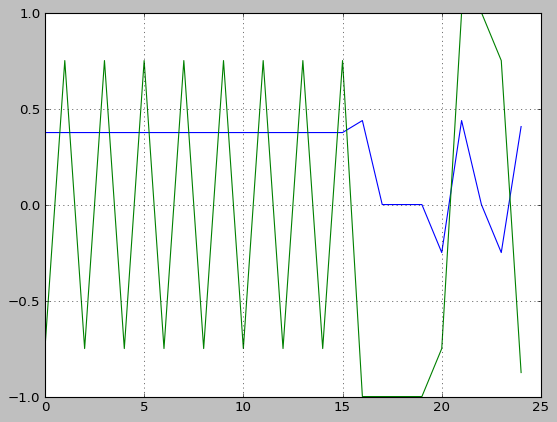

In [196]:
x = new[2:] 
err = []
data = []

for i in range(0, len(x), sps):
    if i < sps:
        continue
    e = (x[i] - x[i-sps]) * x[i-sps//2]
    err.append(e)
    data.append(x[i])

plt.plot(err)
plt.plot(data)
plt.grid()
plt.show()

In [19]:
def slice_to_nrz(x):
    return -1.0 if x < 0 else 1.0


def clip(x, limit):
    if x > limit:
        return limit
    elif x < -limit:
        return -limit
    return x

# def interpolate(x, mu):
#     filter_i = int(np.round(mu * 128))
#     print('filter_i', filter_i)
#     return signal.lfilter(taps[filter_i], [1.0], x)
        

def mm_clock(inp, omega, mu, gain_mu, gain_omega, omega_relative_limit):
    muhist = []
    mmhist = []
    
    d_mu = mu
    d_gain_mu = gain_mu
    d_gain_omega = gain_omega
    d_omega_relative_limit = omega_relative_limit
    d_last_sample = 0
    
    d_omega = omega;
    d_omega_mid = omega;
    d_omega_lim = d_omega_mid * omega_rel_lim;
    out = np.array([0.0] * 10000)
    oo = 0
    ni = len(inp) - 8
    ii = 0
    intfilt = InterpolateFilter()
    while ii < ni:
        muhist.append(d_mu)
        out[oo] = intfilt.filter(inp[ii], d_mu)
        mm_val = slice_to_nrz(d_last_sample) * out[oo] - slice_to_nrz(out[oo]) * d_last_sample
        mmhist.append(mm_val)
        d_last_sample = out[oo]

        d_omega += d_gain_omega * mm_val
        d_omega = d_omega_mid + clip(d_omega-d_omega_mid, d_omega_lim)
        d_mu = d_mu + d_omega + d_gain_mu * mm_val

        ii += int(np.floor(d_mu))
#         print(d_mu, ii)
        d_mu = d_mu - np.floor(d_mu)
        oo += 1
    return out, muhist, mmhist

<IPython.core.display.Javascript object>


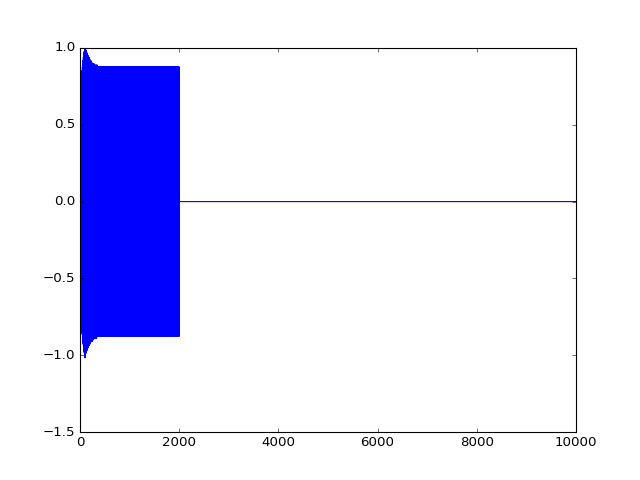

<IPython.core.display.Javascript object>


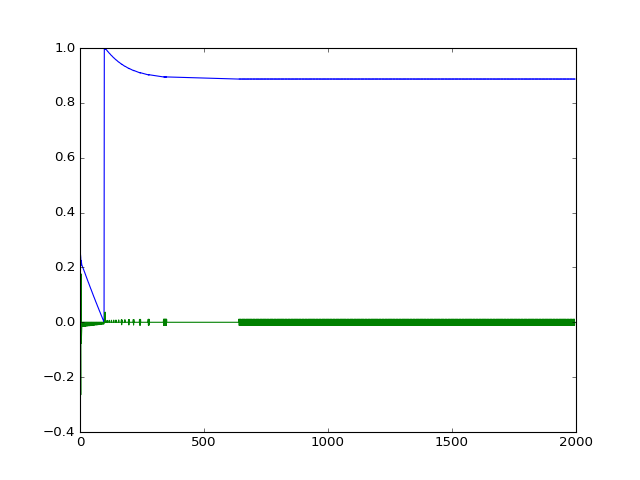

In [180]:
omega = 2
gain_omega = 0.01
mu = 0.25
gain_mu = 0.1
omega_rel_lim = 0.001
data = 1000*[1, 1, -1, -1]
expected_result = 1000*[-1.2, 1.2]

out, muhist, mmhist = mm_clock(data, omega, mu, gain_mu, gain_omega, omega_rel_lim)
plt.plot(out)
plt.show()

plt.plot(muhist)
plt.plot(mmhist)
plt.show()